<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/RFB_RN_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow import keras

[**Python**] - Verificar a versão do Tensorflow
> Assegurar que está a utilizar a versão 2.x.

In [ ]:
tf.__version__

'2.3.0'

[**Python**] - Definir o número de casas decimais

In [2]:
np.set_printoptions(precision= 3)

### 1. Carregar os dados

[**Python**] - Carregar os dados:

In [202]:
# Leitura do dataframe:
df_train = pd.read_csv('/train_6.csv')

In [237]:
df_X = df_train.copy()

In [311]:
df_test = pd.read_csv('/test_6.csv')

In [304]:
df_train.shape

(11033, 128)

In [312]:
df_test.head()

,id,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,cnae2_0,cnae2_1,cnae2_2,...,cnae2_60,cnae2_61,cnae2_62,cnae2_63,cnae2_64,cnae2_65,cnae2_66,cnae2_68,cnae2_69,cnae2_70,cnae2_71,cnae2_72,cnae2_73,cnae2_74,cnae2_75,cnae2_77,cnae2_78,cnae2_79,cnae2_80,cnae2_81,cnae2_82,cnae2_85,cnae2_86,cnae2_87,cnae2_90,cnae2_91,cnae2_93,cnae2_94,cnae2_95,cnae2_96,rf2_0,rf2_1,rf2_2,rf2_3,rf2_4,rf2_5,rf2_6,rf2_7,rf2_8,rf2_9
0,3411,2.003680,-0.494787,-0.495820,-0.442070,0.123285,-0.551138,-0.513523,-0.065299,1.010537,-0.488845,-0.691012,-0.677706,0.001520,-0.272616,-0.732025,1.415327,1.391831,-0.833054,-0.712381,-0.810896,-0.577874,-0.598610,-1.536467,-1.553749,0.437683,0.471211,1.586372,1.598694,0.284143,-1.378361,-1.365289,-0.698925,-0.753537,-0.970113,0.607919,-1.389713,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,5.337850,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,2.648897,-0.228481,-0.290089,-0.654796
1,2177,1.500909,-0.361906,-0.491025,-0.644654,-0.664717,-0.485928,-0.616134,-0.672111,-0.676531,0.008991,2.117592,-0.670669,0.482933,-0.501580,-0.732025,-0.802706,-0.839223,1.286482,1.605530,1.455495,1.737508,1.864395,-1.536467,-1.553749,0.998441,-1.214927,-0.763882,-0.750870,-0.640278,1.036880,1.124830,-0.698925,1.327075,-0.970113,-1.644957,0.719573,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,3.419508,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,3.447216,-0.654796
2,8400,-0.264478,-0.818245,-0.777297,-0.760530,-0.664717,-0.784815,-0.764148,-0.796796,-0.676531,-0.464045,-0.668474,-0.614676,-0.226717,-0.138354,-0.732025,1.415327,1.391831,1.286482,-0.712381,-0.810896,-0.577874,-0.598610,0.675043,0.664488,-1.244591,-1.214927,1.586372,1.598694,-0.640278,1.036880,1.124830,-0.698925,1.327075,1.030808,0.607919,0.719573,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,-0.290089,1.527193
3,464,2.003680,2.163904,2.152560,2.121936,0.669432,2.194291,2.206491,2.209243,-0.016854,2.080461,1.703231,0.253817,1.936345,-0.663413,-0.732025,-0.802706,-0.839223,-0.833054,0.402534,1.150439,1.737508,0.716358,0.386219,0.489691,0.437683,0.471211,-0.763882,-0.750870,1.999869,-1.042884,-0.120230,-0.698925,-0.753537,-0.970113,-1.644957,-1.389713,-0.012893,-0.087294,-0.049994,...,-0.054779,-0.038706,-0.119351,-0.045628,-0.117548,-0.027359,-0.092003,-0.202279,-0.155474,-0.130995,-0.187341,-0.024126,-0.118993,-0.100786,-0.025793,-0.108889,-0.098661,-0.041812,-0.075387,-0.120421,-0.153217,-0.109667,-0.292440,-0.037614,-0.056285,-0.009117,-0.043762,-0.031595,-0.039768,-0.05244,-0.27917,-0.289247,-0.338801,-0.257087,-0.244164,-0.289247,-0.377516,-0.228481,-0.290089,1.527193
4,6672,1.309214,-0.518234,-0.657630,-0.467367,0.125706,-0.631375,-0.750867,-0.511860,-0.051732,-0.709886,-0.253748,-0.677707,-0.466562,-0.480002,-0.732025,-0.802706,-0.839223,-0.833054,1.095358,0.956663,-0.577874,-0.598610,-1.536467,0.664488,-1.244591,-1.214927,-0.763882,-0.750870,-0.640278,-1.378361,-1.365289,-0.69

[**Python**] - Mostrar as primeiras 5 linhas:

In [95]:
df_train.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md7,md8,md9,md10,md12,mc1,mc3,mc4,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind12,ind13,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind31,ind32,ind34,ind36,ind37,target
0,0,86,1,0.015101,0.011256,0.111095,0.003233,0.003233,0.016366,0.021082,0.004541,0.004541,0.130930,0.003945,0.000138,0.003355,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,1.0,1.0,1
1,1,18,9,0.005996,0.019476,0.124770,0.000000,0.010487,0.029214,0.046445,0.000000,0.018198,0.138620,0.003186,0.003121,0.003355,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0125,0.0286,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,0
2,2,74,9,0.000006,0.002902,0.110160,0.002274,0.002274,0.002902,0.020058,0.003131,0.003131,0.130405,0.000015,0.000050,0.000209,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,0
3,3,49,4,0.000009,0.014526,0.120351,0.000000,0.000000,0.014526,0.032017,0.000000,0.000000,0.138620,0.000438,0.000042,0.000115,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0000,0.0000,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.1785,0.1667,0.1667,0.0,0.0,0.0,0.0,1.0,0
4,4,47,1,0.000191,0.004042,0.111078,0.001121,0.001121,0.006063,0.023705,0.011886,0.011886,0.131285,0.001925,0.003121,0.000719,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0


### Pré-processamento e transformação dos dados

[**Python**] - Normalizar os dados - StandardScaler()

In [239]:
df_y = df_X['target']
df_X = df_X.drop(columns= ['target','id'])


In [313]:
X_test = df_test.drop(columns= ['id'])

### 3. Definir as amostras de treinamento e validação

[**Python**] - Definir as amostras de treinamento e validação

In [279]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(df_X, df_y, test_size = 0.15, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste=  {X_teste.shape}')

X: Treinamento=  (9378, 126); X: Teste=  (1655, 126)


In [257]:
print(f'Y: Treinamento =  {y_treinamento.shape}; Y: Teste = {y_teste.shape}')

Y: Treinamento =  (8274,); Y: Teste = (2759,)


### 4. Definir a arquitetura da Rede Neural com _Tensorflow_/_Keras_

[**Python**] - Definir a arquitetura, ou seja:
* $N_{I}$: Número de neurônios na camada de entrada (_Input Layer_);
* $N_{O}$: Número de neurônios na camada de saída (_Output Layer_);
* $N_{H}$: Número de neurônios na camada escondida (_Hidden Layer_);
* FA: Função de ativação;

In [292]:
# Número de Neurônios na Input Layer:
N_I = 126

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 200

N_H2 = 200

N_H3=200

N_H4 = 200

# Função de Ativação da Hidden Layer:
#FA_H = tf.nn.leaky_relu
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer:
FA_O = tf.keras.activations.sigmoid




[**Python**] - Definir as sementes para NumPy e Tensorflow:
> Por questões de reproducibilidade de resultados, use as sementes abaixo:

* NumPy: 20111974;
* Tensorflow: 20111974;

In [244]:
np.random.seed(19800922)
tf.random.set_seed(22091980)


[**Python**] - Definir a Rede Neural:





* 1 camada _dropout_ com $p= 0.1$:

In [293]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN= Sequential()
RN.add(Dense(N_H, input_dim= N_I, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.25))
RN.add(Dense(N_H2, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.25))
RN.add(Dense(N_H3, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.25))
RN.add(Dense(N_H4, kernel_initializer= tf.keras.initializers.GlorotNormal(), activation= FA_H, kernel_constraint= tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.25))
RN.add(Dense(units= N_O, activation= FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 200)               25400     
_________________________________________________________________
dropout_134 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_135 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_171 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_136 (Dropout)        (None, 200)               0         
_________________________________________________________________
dense_172 (Dense)            (None, 200)             

### 5. Compilar a Rede Neural

Este é um problema de classificação binária (_Male_ ou _Female_). Portanto, temos:
* optimizer= tf.keras.optimizers.Adam();
* loss=  tf.keras.losses.MeanSquaredError() ou loss= tf.keras.losses.BinaryCrossentropy(). Particularmente, eu gosto de usar loss=  tf.keras.losses.MeanSquaredError() porque o resultado é mais intuitivo;
* metrics= tf.keras.metrics.binary_accuracy.

[**Python**] - Comando modelo.compile(optimizer, loss, metrics):

In [294]:

Algoritmo_Opt = tf.keras.optimizers.Adam()
#Algoritmo_Opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.8, beta_2=0.99, epsilon=1e-07 , amsgrad=True,     name='Adam')
Loss_Function = tf.keras.losses.MeanSquaredError()
Metrics_Perf = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = Algoritmo_Opt, loss = Loss_Function, metrics = Metrics_Perf)

### 6. Ajustar a Rede Neural

Obs.: A opção callbacks abaixo implementa o conceito de _early stopping_. Esta opção vai parar o processo de treinamento da Rede Neural antes de atingirmos o númerco de _epochs_ quando o modelo pára de melhorar, medido pela métrica val_loss. O parâmetro _patience_= k significa que o processo de otimização vai parar se tivermos k _epochs_ consecutivas sem observarmos melhoria da performance da Rede Neural.

[**Python**] - Comando modelo.fit(X_treinamento, y_treinamento, epochs)

In [295]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
hist= RN.fit(X_treinamento, y_treinamento, epochs = 100, 
             validation_data = (X_teste, y_teste), 
             callbacks = callbacks)

Epoch 1/100
294/294 [==============================] - 1s 4ms/step - loss: 0.1702 - binary_accuracy: 0.7640 - val_loss: 0.1607 - val_binary_accuracy: 0.7776
Epoch 2/100
294/294 [==============================] - 1s 3ms/step - loss: 0.1619 - binary_accuracy: 0.7672 - val_loss: 0.1607 - val_binary_accuracy: 0.7746
Epoch 3/100
294/294 [==============================] - 1s 3ms/step - loss: 0.1594 - binary_accuracy: 0.7705 - val_loss: 0.1601 - val_binary_accuracy: 0.7710
Epoch 4/100
294/294 [==============================] - 1s 3ms/step - loss: 0.1578 - binary_accuracy: 0.7723 - val_loss: 0.1634 - val_binary_accuracy: 0.7650
Epoch 5/100
294/294 [==============================] - 1s 3ms/step - loss: 0.1555 - binary_accuracy: 0.7740 - val_loss: 0.1572 - val_binary_accuracy: 0.7752
Epoch 6/100
294/294 [==============================] - 1s 3ms/step - loss: 0.1543 - binary_accuracy: 0.7768 - val_loss: 0.1570 - val_binary_accuracy: 0.7789
Epoch 7/100
294/294 [==============================] - 1s 

In [ ]:
def Model_Loss(hist):
    print(hist.history.keys())
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_Accuracy(hist):
    print(hist.history.keys())
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Model_MSE(hist):
    print(hist.history.keys())
    plt.plot(hist.history['mse'])
    plt.plot(hist.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(['Training', 'Validation'], loc= 'upper right')
    plt.show()

def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(X_teste)
    mc = confusion_matrix(y_teste, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

In [ ]:
Model_Accuracy(hist)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


KeyError: ignored

In [ ]:
Model_Loss(hist)

NameError: ignored

### 7. Avaliar a performance da Rede Neural

Para avaliar a a Rede Neural, simplesmente informamos as amostras de teste: X_teste e y_teste. A função evaluate() vai retornar uma lista contendo 2 valores: loss e accuracy.

[**Python**] - Comando modelo.evaluate(X_teste, y_teste)

In [296]:
RN.evaluate(X_teste, y_teste)

52/52 [==============================] - 0s 1ms/step - loss: 0.1680 - binary_accuracy: 0.7650


[0.16795071959495544, 0.764954686164856]

In [46]:
#hist2 = RN.fit(df_X, df_y, epochs = 200, callbacks = callbacks)

In [297]:
RN.evaluate(df_X, df_y)

345/345 [==============================] - 0s 1ms/step - loss: 0.1286 - binary_accuracy: 0.8189


[0.12855608761310577, 0.8189069032669067]

In [298]:
RN.evaluate(X_treinamento, y_treinamento)

294/294 [==============================] - 0s 1ms/step - loss: 0.1216 - binary_accuracy: 0.8284


[0.12160388380289078, 0.8284282088279724]

A seguir, a matriz de confusão:

In [ ]:
def Mostra_ConfusionMatrix():
    y_pred = RN.predict_classes(df_X)
    mc = confusion_matrix(df_y, y_pred)
    #sns.heatmap(mc,annot=True, annot_kws={"size": 10},fmt="d")
    sns.heatmap(mc/np.sum(mc), annot=True, annot_kws={"size": 10}, fmt='.2%', cmap='Blues')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


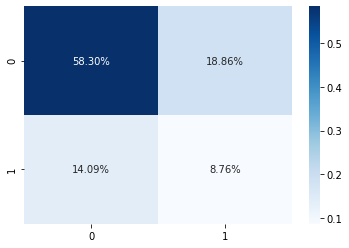

In [ ]:
Mostra_ConfusionMatrix()

### 8. _Fine tuning_ da Rede Neural

Para aumentar a acurácia da Rede Neural, sugiro aumentarmos o número de neurônios na _Hidden Layer_ e/ou aumentar o número de _Hidden Layers_.

No entanto, obtivemos uma acurácia razoável com a Rede Neural _baseline_. Portanto, deixo como exercício para os alunos o desafio de melhorar a acurácia desta Rede Neural.

### 9. Fazer Predições com a Rede Neural

[**Python**] - Comando:
* RN.predict_classes(X_treinamento);
* RN.predict_classes(X_teste).

In [314]:
y_test = RN.predict_classes(X_test)

df_submit = pd.concat([df_test['id'],pd.DataFrame(y_test,columns=['target']).astype('boolean')],axis=1)

df_submit.to_csv('/PyLadies_NL_10.csv',index = False, sep = ',')

In [315]:
df_submit['target'].value_counts()

False    869
True     131
Name: target, dtype: Int64

### 10. Conclusões

Desenvolvemos uma Rede Neural capaz de identificar Sexo (_Gender_) com acurácia= 0.9120.

### Salvar a Rede Neural

In [316]:
# Save the weights
RN.save('/RN_10.h5')